In [1]:
import pandas as pd

#defining load_data, method to be used later to help load forestFires.csv file into jupyter
def load_data(path):
    return pd.read_csv(path)

In [2]:
#Loading the data into reference called 'fire'
fire = load_data('forestFires.csv')

In [3]:
fire[0:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
#Gather relevant information on all attributes
fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
#Figuring out the average area of forest fires in Portugal (from dataset) and comparing with fire.describe()
avgArea = fire['area'].sum() / fire['area'].count()
print(avgArea)

12.847292069632493


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11379ceb8>,
      dtype=object)

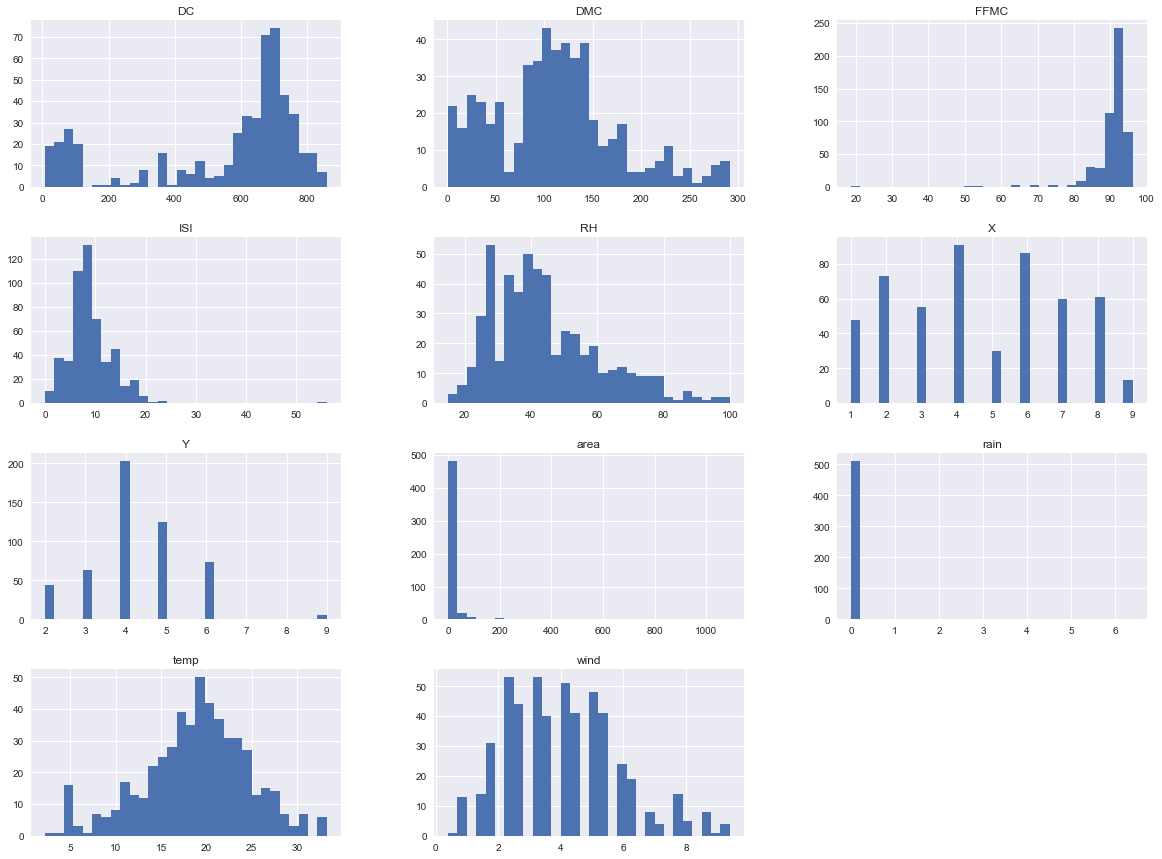

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fire.hist(bins=30, figsize=(20,15))

#Histograms show our target is skewed towards small fires
#Rain is also skewed towards 0 (fires typically occur when its not raining)

In [8]:
print("Correlation:", fire.corr(method = 'pearson'))
#Correlation table shows that Temp has most positive correlation to area affected (0.097844)

Correlation:              X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X  

In [9]:
import sklearn

In [10]:
from sklearn.model_selection import train_test_split

#Splitting data into 80/20 training and testing split.
train_set, test_set = train_test_split(fire, test_size=0.2, random_state=42)

#storing training data into variable called work_set so we can manipulate it as much as we want
work_set = train_set.copy()

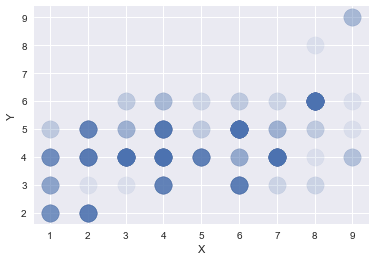

In [11]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300)

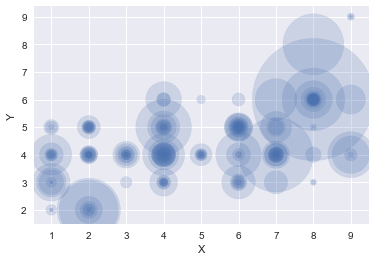

In [12]:
#Shows us the burn area in terms of location
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area'])
#Here we can see that more fires tend to happen in the left central side, but they tend to be smaller. Those on the right side tend to be bigger but more infrequent.

In [13]:
# we ran a correlation analysis on all attributes to area, and found DMC and temp to have strongest positive correlation to area burned, and RH to have least correlation

corr_matrix = work_set.corr()
corr_matrix['area'].sort_values(ascending=False)

area    1.000000
DMC     0.115296
temp    0.100529
X       0.097316
Y       0.064545
FFMC    0.048985
DC      0.048709
ISI     0.037799
wind    0.012684
rain   -0.005113
RH     -0.057473
Name: area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16b7f710>,
      dtype=object)

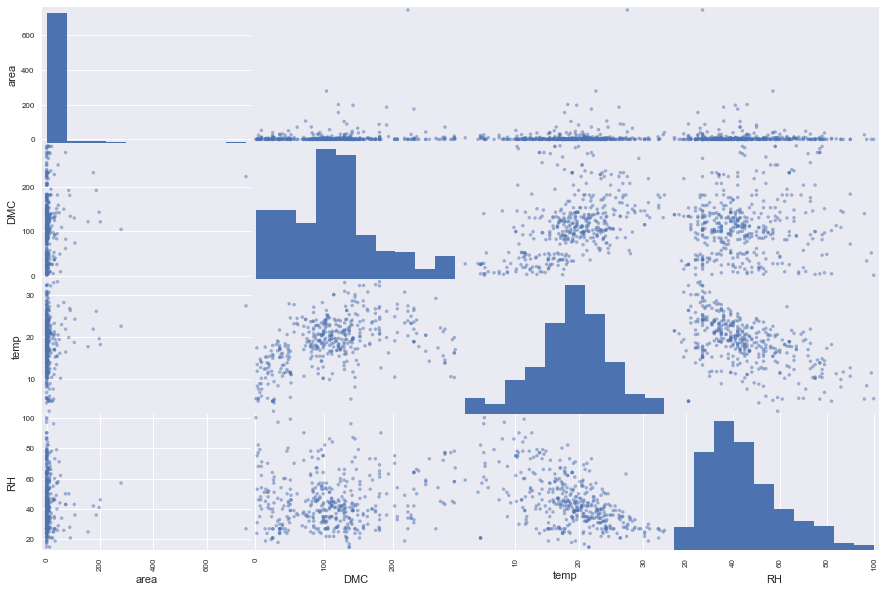

In [14]:
from pandas.plotting import scatter_matrix

attributes = ['area', 'DMC', 'temp', 'RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [15]:
fires = work_set.drop('area', axis=1)
fires_labels = work_set['area'].copy()

In [16]:
fires['month'].unique()

array(['sep', 'aug', 'feb', 'mar', 'oct', 'apr', 'dec', 'jul', 'jun',
       'jan', 'may', 'nov'], dtype=object)

In [17]:
fires['day'].unique()

array(['sat', 'mon', 'tue', 'sun', 'fri', 'thu', 'wed'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelBinarizer

month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = fires['month']
days = fires['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = fires.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
scaled_features

array([[-2.88472000e-01, -1.09485913e+00,  2.80285578e-01, ...,
        -1.05941934e+00,  1.63124094e-03, -6.78170911e-02],
       [-2.88472000e-01, -2.66696454e-01,  6.16522396e-02, ...,
        -3.35214892e-01, -1.00892252e+00, -6.78170911e-02],
       [-1.16128472e+00,  5.61466218e-01,  2.63467629e-01, ...,
         1.47588074e-01,  1.63124094e-03, -6.78170911e-02],
       ...,
       [-1.16128472e+00, -1.92302180e+00,  2.63467629e-01, ...,
         6.90741409e-01, -5.03645641e-01, -6.78170911e-02],
       [-1.16128472e+00,  5.61466218e-01,  4.48342905e-02, ...,
         3.88989556e-01, -1.23349003e+00, -6.78170911e-02],
       [-1.16128472e+00, -2.66696454e-01,  7.17552255e-01, ...,
        -2.74864521e-01,  1.63124094e-03, -6.78170911e-02]])

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [23]:
from sklearn.pipeline import Pipeline
import numpy as np

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((fires['month'].unique(), fires['day'].unique()), axis=0)

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

In [24]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [25]:
fires_prepared = full_pipeline.fit_transform(fires)

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(fires_prepared, fires_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#implementing the Linear Regressoin model and running some test cases on them. 

some_data = fires.iloc[:5]
some_labels = fires_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_predictions = lr_model.predict(some_data_prepared)

In [28]:
#When printing the results, we see that our predictions are very off from the actual value. 

print(some_predictions)
print(list(some_labels))

[18.95308067 17.52143095  1.8387682  19.12084738  6.85086008]
[3.33, 3.07, 3.09, 14.68, 6.38]


In [29]:
#Running Mean Squared Error test on the entire training set to tell us error value. 
#Our mean area size is ~12 and our median is ~0.5 which means an error of 44 is actually pretty awful. 
#It seems like our model is likely underfitting our data, or our outliers are massively skewing our predictions. 
#Our largest fire is a size of 1000+ and our median is 0.5, so it's likely a matter of our model not being powerful enough.

from sklearn.metrics import mean_squared_error

fires_predictions = lr_model.predict(fires_prepared)
lr_mse = mean_squared_error(fires_labels, fires_predictions)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)

44.45327410460618


In [30]:
#More powerful model, trying to see improvement

from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(fires_prepared, fires_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
fires_predictions = dtr_model.predict(fires_prepared)
dtr_mse = mean_squared_error(fires_labels, fires_predictions)
dtr_rmse = np.sqrt(dtr_mse)
print(dtr_rmse)

0.6246162986835309


In [32]:
#That's a super good improvement on our last model...
#It's important that we don't touch our test set until we have a model that we're confident about. 
#So let's really make sure by implementing what's called cross-validation. 
#This will randomly split the training set into k distinct folds and then train and evaluate the model k times, picking a different fold for evalution each time and training on the other folds.

In [33]:
#The cross_val_score function expects a utility scoring function (greater is better) rather than a cose function(lower is better) 
#which is why we compute -scores before calculating the square root.

from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = np.sqrt(-dtr_scores)

lr_scores = cross_val_score(lr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

In [34]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(dtr_rmse_scores)
display_scores(lr_rmse_scores)

Scores:  [ 27.29181091 128.37171617 164.86010453  25.36430467  77.57193991
  39.93095529  56.69363674 122.45440124  41.26642479  54.6645463 ]
Mean:  73.84698405300388
Standard Deviation:  45.8528496941073
Scores:  [ 16.79396157  54.45474309  20.60609778  16.93858408  41.23049924
  21.97246638  20.03594328 119.15641167  16.23465441  33.28695881]
Mean:  36.07103203205487
Standard Deviation:  30.169037125172274


In [35]:
#Turns out our linear regression model actually turns out to perform better than our dtr model. 
#This shows how bad overfitting can be. The *RandomForestRegressor* is an ensemble model that works by training many decision trees on random subsets of features and then averaging out their predictions. 
#Ensemble models use many different models under the hood, and this can often be a great way to improve the performance of more basic models.

In [36]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(fires_prepared, fires_labels)
rfr_scores = cross_val_score(rfr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [ 13.95496638  84.52458939  50.48478948  33.2461233   35.76658156
  24.65341717  29.13681746 119.66928101  18.65312556  33.18670234]
Mean:  44.327639366552845
Standard Deviation:  31.38438537606187


In [37]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(fires_prepared, fires_labels)
sgd_scores = cross_val_score(sgd_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)

display_scores(sgd_rmse_scores)

Scores:  [ 15.73525379  54.04461486  17.91319375  15.9445544   33.94070714
  20.62601243  18.85237177 118.71216053  13.05776831  31.91965658]
Mean:  34.07462935579947
Standard Deviation:  30.573663558476127


/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

In [38]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(fires_prepared, fires_labels)
ransac_scores = cross_val_score(ransac, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
ransac_rmse_scores = np.sqrt(-ransac_scores)

display_scores(ransac_rmse_scores)

Scores:  [ 17.26709531  57.140772    18.60959504  15.55447187  35.64539303
  23.88750735  16.73267757 121.4315211   12.26906592  33.65591959]
Mean:  35.21940187771066
Standard Deviation:  31.46024651869017


In [39]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(fires_prepared, fires_labels)
svr_scores = cross_val_score(svr, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)

display_scores(svr_rmse_scores)

Scores:  [ 14.97786686  56.63886477  16.60063884  14.97942427  35.21825281
  21.03908413  17.23376053 121.18246629  10.13282283  33.78649943]
Mean:  34.17896807625688
Standard Deviation:  31.87413676493507


In [40]:
from sklearn.model_selection import GridSearchCV

grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_rfr_model = RandomForestRegressor()
grid_search = GridSearchCV(grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(fires_prepared, fires_labels)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
print('Best: ',  np.sqrt(-grid_search.best_score_), grid_search.best_params_)

Best:  48.668422240004354 {'max_features': 2, 'n_estimators': 30}


In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'alpha': np.random.uniform(0, 0.001, 5),
    'epsilon': np.random.uniform(0, 0.1, 5),
    'l1_ratio': np.random.uniform(0, 0.1, 5),
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
random_sgd_model = SGDRegressor()
random_sgd_search = RandomizedSearchCV(random_sgd_model, n_iter=100, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_sgd_search.fit(fires_prepared, fires_labels)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'alpha': array([0.00016, 0.00043, 0.0002 , 0.0002 , 0.0007 ]), 'epsilon': array([0.05904, 0.08392, 0.01125, 0.0889 , 0.00978]), 'l1_ratio': array([0.01538, 0.01228, 0.0893 , 0.09065, 0.06431]), 'learning_rate': ['constant', 'optimal', 'invscaling']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',


In [43]:
print('Best: ', np.sqrt(-random_sgd_search.best_score_), random_sgd_search.best_params_)

Best:  45.739848052206796 {'loss': 'squared_loss', 'learning_rate': 'invscaling', 'l1_ratio': 0.09064951391721177, 'epsilon': 0.01124648186140953, 'alpha': 0.00016012346353680375}


In [44]:
random_params = {
    'C': np.random.uniform(0.5, 1.5, 5),
    'epsilon': np.random.uniform(0, 0.2, 5),
    'degree': [2, 3, 4, 5, 6],
}
random_svr_model = SVR()
random_svr_search = RandomizedSearchCV(random_svr_model, n_iter=50, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_svr_search.fit(fires_prepared, fires_labels)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'C': array([1.45696, 1.47554, 1.0114 , 1.07053, 0.63881]), 'epsilon': array([0.15264, 0.14777, 0.07925, 0.14483, 0.05788]), 'degree': [2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [45]:
print('Best: ', np.sqrt(-random_svr_search.best_score_), random_svr_search.best_params_)

Best:  46.705198351144695 {'epsilon': 0.057884872237746125, 'degree': 3, 'C': 1.4755435482809582}


In [46]:
feature_names = np.concatenate((numerical_attributes, categorical_classes), axis=0)
sgd_importances = zip(sgd_model.coef_, feature_names)

for feature in sorted(sgd_importances, key=lambda t: t[0]):
    print(feature)

(-2.224988890132854, 'RH')
(-1.85102064401023, 'DC')
(-1.1989651720164172, 'ISI')
(-0.7369095057267023, 'fri')
(-0.6929727798587098, 'rain')
(-0.38652138913633677, 'FFMC')
(-0.20256172720198204, 'jun')
(-0.11791428355937614, 'apr')
(-0.1126026130039825, 'mar')
(-0.035289326118920696, 'nov')
(0.014515878065587138, 'sun')
(0.11141771385859964, 'jan')
(0.20305718050752875, 'oct')
(0.25628195144677046, 'Y')
(0.3564157398303248, 'may')
(0.6601724215509307, 'dec')
(0.7747850097608516, 'tue')
(0.9524784223715762, 'feb')
(1.0576307137764274, 'wed')
(1.2931606420345723, 'mon')
(1.461422122294633, 'jul')
(1.5470172544170877, 'wind')
(2.192546871800181, 'temp')
(2.461161336243204, 'aug')
(2.4802387227572065, 'sep')
(2.694150688059676, 'sat')
(3.120662283559325, 'thu')
(4.3185034109817275, 'X')
(5.2079234748439385, 'DMC')


In [47]:
ransac_importances = zip(ransac.estimator_.coef_, feature_names)

for feature in sorted(ransac_importances, key=lambda t: t[0]):
    print(feature)

(-4.654194262808311, 'sun')
(-3.6031059291071053, 'jul')
(-2.1423179377906116, 'tue')
(-1.1626582414320983, 'wind')
(-1.1136209971175584, 'sep')
(-0.9180952618848571, 'ISI')
(-0.8528731333732451, 'temp')
(-0.6709497511335049, 'X')
(-0.36872290537285707, 'mon')
(-0.22698098556523696, 'wed')
(-0.06689832163825535, 'mar')
(-2.220446049250313e-15, 'jan')
(-8.881784197001252e-16, 'feb')
(6.661338147750939e-16, 'dec')
(8.881784197001252e-16, 'may')
(8.881784197001252e-16, 'nov')
(0.10296727938056381, 'aug')
(0.14795946110917294, 'oct')
(0.32120927235913355, 'DC')
(0.4803204608926461, 'sat')
(0.5603486886338681, 'Y')
(0.568343352688865, 'RH')
(0.6517086344201505, 'DMC')
(0.9192496713376815, 'FFMC')
(1.9709036357744836, 'fri')
(2.071520651890628, 'jun')
(2.4611778554825396, 'apr')
(4.291066881719379, 'rain')
(4.940991994869889, 'thu')


In [48]:
svr_importances = zip(svr.coef_[0], feature_names)

for feature in sorted(svr_importances, key=lambda t: t[0]):
    print(feature)

(-1.4364201562359202, 'aug')
(-1.254557757145335, 'mar')
(-1.0040381002609982, 'apr')
(-1.0, 'oct')
(-1.0, 'jun')
(-1.0, 'nov')
(-0.540348790701854, 'jul')
(-0.346525765375004, 'feb')
(-0.3308955173072823, 'sep')
(-0.258221297627101, 'fri')
(-0.2558628640156506, 'ISI')
(-0.25025202298521787, 'sun')
(-0.1272440638849508, 'thu')
(-0.10764925818224214, 'DC')
(-0.03754372691251451, 'sat')
(0.03832947786900287, 'RH')
(0.044780536541352944, 'temp')
(0.07092282272062711, 'Y')
(0.13461479117619035, 'X')
(0.16524477713730024, 'mon')
(0.17634120710632994, 'FFMC')
(0.24730668104693754, 'wind')
(0.24947747621676175, 'wed')
(0.25853885805572174, 'tue')
(0.4635680533285935, 'rain')
(0.5369653768154521, 'DMC')
(0.9127860870263943, 'jan')
(1.0, 'may')
(6.0, 'dec')


In [49]:
num_fires_prepared = numerical_pipeline.fit_transform(fires)

num_sgd_model = SGDRegressor()
num_sgd_model.fit(num_fires_prepared, fires_labels)
num_sgd_scores = cross_val_score(num_sgd_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_sgd_rmse_scores = np.sqrt(-num_sgd_scores)

display_scores(num_sgd_rmse_scores)

Scores:  [ 16.11507129  53.88440547  17.99541211  17.4140197   33.50689409
  20.64971682  18.28138779 118.5901618   12.95335749  31.13452106]
Mean:  34.05249476387538
Standard Deviation:  30.46094197965501


/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SG

In [50]:
num_svr_model = SVR(kernel='linear')
num_svr_model.fit(num_fires_prepared, fires_labels)
num_svr_scores = cross_val_score(num_svr_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_svr_rmse_scores = np.sqrt(-num_svr_scores)

display_scores(num_svr_rmse_scores)

Scores:  [ 15.11872085  56.69568373  16.56367664  15.18100974  35.30678089
  21.07577779  17.24739507 121.07724146  10.19703672  33.77128572]
Mean:  34.223460860805794
Standard Deviation:  31.8241252833191


In [51]:
num_ransac_model = RANSACRegressor()
num_ransac_model.fit(num_fires_prepared, fires_labels)
num_ransac_scores = cross_val_score(num_ransac_model, num_fires_prepared, fires_labels,
                                    scoring='neg_mean_squared_error', cv=10)
num_ransac_rmse_scores = np.sqrt(-num_ransac_scores)

display_scores(num_ransac_rmse_scores)

Scores:  [ 15.3075061   57.89148891  16.94326911  15.90765386  35.40977207
  21.77571534  17.6548619  121.49008604  10.87279105  34.13371664]
Mean:  34.73868610121132
Standard Deviation:  31.844946253229963


In [52]:
grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

num_grid_rfr_model = RandomForestRegressor()
num_grid_search = GridSearchCV(num_grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
num_grid_search.fit(num_fires_prepared, fires_labels)

/Users/anthonyfreay/anaconda3/envs/tf0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
print('Best: ',  np.sqrt(-num_grid_search.best_score_), num_grid_search.best_params_)

Best:  49.833697942713755 {'max_features': 2, 'n_estimators': 30}


In [54]:
num_svr_importances = zip(num_svr_model.coef_[0], numerical_attributes)

for feature in sorted(num_svr_importances, key=lambda t: t[0]):
    print(feature)

(-0.3094406368106508, 'ISI')
(-0.16232400766246569, 'temp')
(-0.032838040008783875, 'RH')
(0.16365567654261204, 'FFMC')
(0.1723188062307237, 'X')
(0.1748446570899631, 'Y')
(0.25343579649023384, 'DC')
(0.28921254488584447, 'wind')
(0.30181697487219417, 'DMC')
(0.4748548227199505, 'rain')


In [55]:
num_ransac_importances = zip(num_ransac_model.estimator_.coef_, numerical_attributes)

for feature in sorted(num_ransac_importances, key=lambda t: t[0]):
  print(feature)

(-8.639336064626827, 'FFMC')
(-0.49984288362828927, 'RH')
(-0.052590113768569154, 'Y')
(0.027743288089675692, 'ISI')
(0.03465320089606607, 'rain')
(0.4124056755838824, 'X')
(0.9108429050859098, 'DC')
(1.0157868137226493, 'wind')
(1.3993094660456844, 'DMC')
(2.9580613409353833, 'temp')


In [56]:
num_sgd_importances = zip(num_sgd_model.coef_, numerical_attributes)

for feature in sorted(num_sgd_importances, key=lambda t: t[0]):
    print(feature)

(-2.20519190305191, 'RH')
(-1.424850331541054, 'ISI')
(-1.3160530932420262, 'DC')
(-0.677622993441352, 'rain')
(-0.4036025314384091, 'FFMC')
(0.12133957651849134, 'Y')
(1.2540291617843944, 'wind')
(2.078233066578582, 'temp')
(3.873008776513923, 'X')
(5.2044453117977, 'DMC')
